### Import Dependencies

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from moviepy.editor import VideoFileClip
import os
rc('animation', html='html5')
%matplotlib inline

### Creating Pseudo Data

In [13]:
beta_0 = 3.0
beta_1 = 6.0
beta_2 = 0.5
beta_3 = 0.75

def cubic_augment(x):
    return (beta_0 + beta_1*x + beta_2 * (x ** 2) + beta_3 * (x ** 3)) + np.random.uniform(-5, 5, size=1)

cubic_np = np.vectorize(cubic_augment)

X_train = np.random.uniform(-5, 5, size=30)
y_train = cubic_np(X_train)

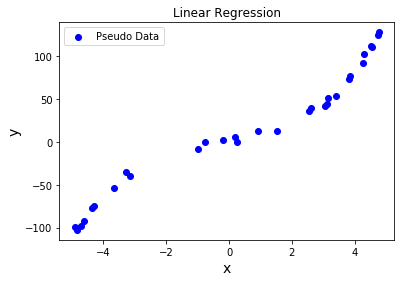

In [14]:
plt.scatter(X_train, y_train, c='blue', label='Pseudo Data')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.title('Linear Regression')
plt.legend()
plt.show()

### Training the model via gradient descent

##### We initialize some model of form $y = \beta_0 + \beta_1x + \beta_2 x^2 + \beta_3 x^3$ (the degree is a changeable parameter). We then run through one batch (also a tuneable parameter), compute the cost, and perfrom gradient descent.

##### Once we feed through one batch, we obtain some $\hat{y}$, we then find the loss, defined by $ L =(\hat{y} - y)^2$ (this is know as mse). We now take the partial derivative of the loss function with respect to each paramater ($\beta$ list)

## $\frac{\partial L}{\partial \beta_0} = 2(\hat{y} - y)$ 

## $\frac{\partial L}{\partial \beta_1} = 2(\hat{y} - y)  x$ 
## $\frac{\partial L}{\partial \beta_2} = 2(\hat{y} - y) x^2$ 
## $\frac{\partial L}{\partial \beta_3} = 2(\hat{y} - y) x^3$ 

##### We now subtract the gradient term, times some learning rate, from the original $\beta$'s

In [15]:
def train(X_data, y_data, degree=3, batch_size=5, learning_rate=0.0001, return_all=False):
    # Initialize the parameter list
    beta_list = [np.random.uniform(0, 80) for _ in range(degree + 1)]
    all_beta_list = []
    convergence = 0.9
    # Set the loss to some high value
    loss = 500000
    previous_losses = []
    previous = False
    while loss > convergence and previous == False:
        loss_list = []
        # We are going to be training by vectorization, instead of individually computing the gradients
        for i in range(len(X_data) // batch_size):
            x_batch = X_data[i * batch_size: (i + 1) * batch_size]
            y_batch = y_data[i * batch_size: (i + 1) * batch_size]
            
            # Compute the predicted value (y hat)
            y_hat = np.sum([beta_list[i] * (x_batch ** i) for i in range(degree + 1) ],axis=0)
            batch_loss = ((y_hat - y_batch) ** 2) * (1/float(batch_size))
            loss_list.append(batch_loss)
            # compute a list of the gradients
            gradient_list = [np.sum(2 * (y_hat - y_batch) * (x_batch ** i)) for i in range(degree +1)]
            
            # Update the parameters
            beta_list = beta_list - np.multiply(((1.0/float(batch_size)) * learning_rate) , gradient_list)
        if return_all:
            all_beta_list.append(beta_list)
        loss = np.sum(loss_list)
        previous_losses.append(loss)
        
        # The next logic statement checks to see if the last 30 losses are the same, if they are, the training stops
        if len(previous_losses) > 50 and list(map(int, previous_losses[-30:-1:])) == list(map(int, previous_losses[-29::])):
            previous = True
    if return_all:
        return all_beta_list
    else:
        return beta_list

### Now we can see visually how the trained model

In [16]:
# Function that takes a beta list and outputs a function
def make_function(x, beta_list):
    var_list = [beta_list[i] * (x ** i) for i in range(len(beta_list))]
    return sum(var_list)

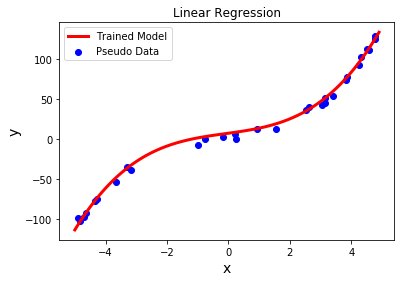

In [17]:
beta_list = train(X_train, y_train)

x_range = np.arange(-5,5,0.1)
plt.plot(x_range, make_function(x_range, beta_list=beta_list), c='red', lw=3, label='Trained Model')
plt.scatter(X_train, y_train, c='blue', label='Pseudo Data')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.title('Linear Regression')
plt.legend()
plt.show()

### Gradient Descent Gif

#### I am not going to run the animation, as it makes the file too large. That should not stop you though!

In [18]:
%%capture

fig, ax = plt.subplots()
beta_list = train(X_train, y_train, return_all=True)[:len(beta_list) - 30]
frame_number = 30
list_index = len(beta_list) // frame_number
ax.cla()
def update(i):
    ax.cla();
    x_range = np.arange(-5,5,0.1);
    ax.set_ylim(-150, 150);
    ax.plot(x_range, make_function(x_range, beta_list=beta_list[i * list_index]), c='red', lw=3, label='Trained Model');
    ax.scatter(X_train, y_train, c='blue', label='Pseudo Data');
    ax.set_xlabel('x', size=14);
    ax.set_ylabel('y', size=14);
    ax.set_title('Linear Regression - Epoch: {}'.format(i * list_index), size=18);
    ax.legend();
    return ax;
    
anim = FuncAnimation(fig, update, frames=np.arange(0, frame_number + 1), interval=150);

#### If you would like to save the mp4 above as a gif, you can do the following

In [26]:
clip = VideoFileClip('**your_mp4_video_path.mp4**')
clip.write_gif('**whatever_you_want_to_call_it.gif')